## Linear regression using gradient descent

Epoch 100/1000, Loss: 4.8783, w: 3.5361, b: 3.4280
Epoch 200/1000, Loss: 2.1452, w: 3.2878, b: 5.0437
Epoch 300/1000, Loss: 1.2466, w: 3.1454, b: 5.9701
Epoch 400/1000, Loss: 0.9513, w: 3.0637, b: 6.5012
Epoch 500/1000, Loss: 0.8541, w: 3.0169, b: 6.8058
Epoch 600/1000, Loss: 0.8222, w: 2.9901, b: 6.9804
Epoch 700/1000, Loss: 0.8117, w: 2.9747, b: 7.0805
Epoch 800/1000, Loss: 0.8083, w: 2.9659, b: 7.1379
Epoch 900/1000, Loss: 0.8071, w: 2.9608, b: 7.1709
Epoch 1000/1000, Loss: 0.8068, w: 2.9579, b: 7.1897


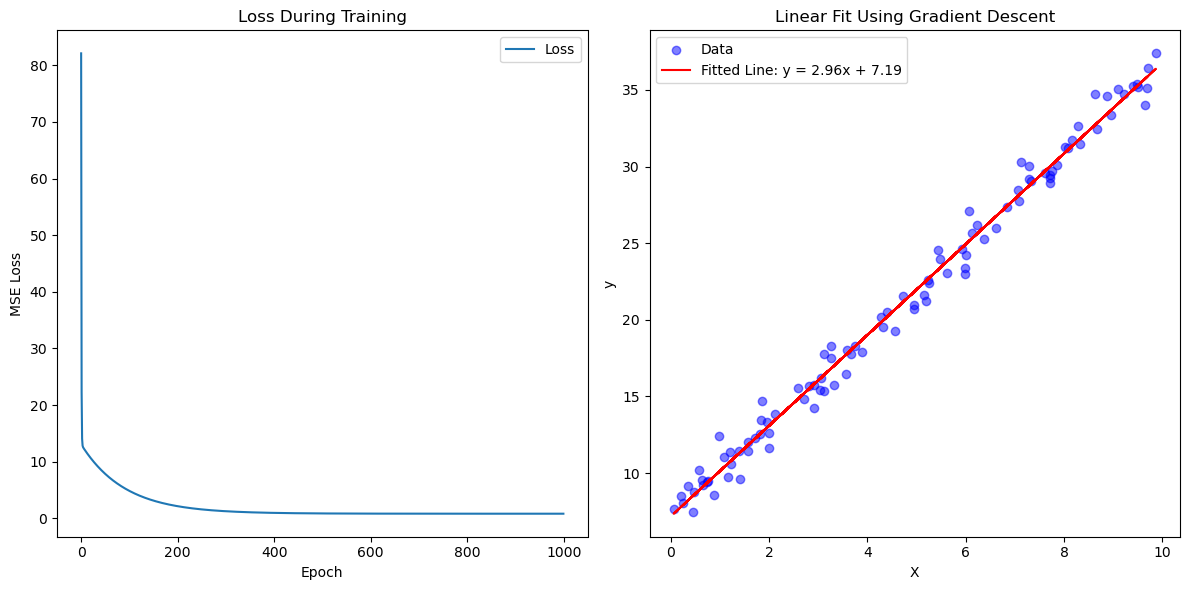

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 생성
np.random.seed(42)  # 재현성을 위한 시드 설정
n_samples = 100

# y = 3x + 7 + noise 형태의 데이터 생성
X = np.random.rand(n_samples) * 10  # 0 ~ 10 사이의 랜덤 값
true_slope = 3
true_intercept = 7
noise = np.random.randn(n_samples)  # 노이즈 추가
y = true_slope * X + true_intercept + noise

# 2. Batch Gradient Descent 알고리즘 구현
# 초기 파라미터 설정
a = 0  # 초기 기울기
b = 0  # 초기 절편
learning_rate = 0.01
n_epochs = 1000

# 손실 함수(MSE) 계산 함수
def compute_loss(X, y, a, b):
    y_pred = a * X + b
    loss = np.mean((y - y_pred) ** 2)
    return loss

# 기울기 계산 함수
def compute_gradients(X, y, a, b):
    n = len(X)
    y_pred = a * X + b
    da = -2 / n * np.sum(X * (y - y_pred))
    db = -2 / n * np.sum(y - y_pred)
    return da, db

# Gradient Descent 학습
loss_history = []
for epoch in range(n_epochs):
    da, db = compute_gradients(X, y, a, b)
    a -= learning_rate * da
    b -= learning_rate * db

    # 손실 계산 및 저장
    loss = compute_loss(X, y, a, b)
    loss_history.append(loss)

    # 100번마다 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss:.4f}, w: {a:.4f}, b: {b:.4f}")

# 3. 결과 시각화
plt.figure(figsize=(12, 6))

# 손실 함수 시각화
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss During Training")
plt.legend()

# 데이터와 모델의 직선 시각화
plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Data", color="blue", alpha=0.5)
plt.plot(X, a * X + b, color="red", label=f"Fitted Line: y = {a:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Fit Using Gradient Descent")
plt.legend()

plt.tight_layout()
plt.show()

### Scikit-learn에서의 linear regression

기울기 (slope): 2.9540
절편 (intercept): 7.2151
Mean Squared Error (MSE): 0.8066


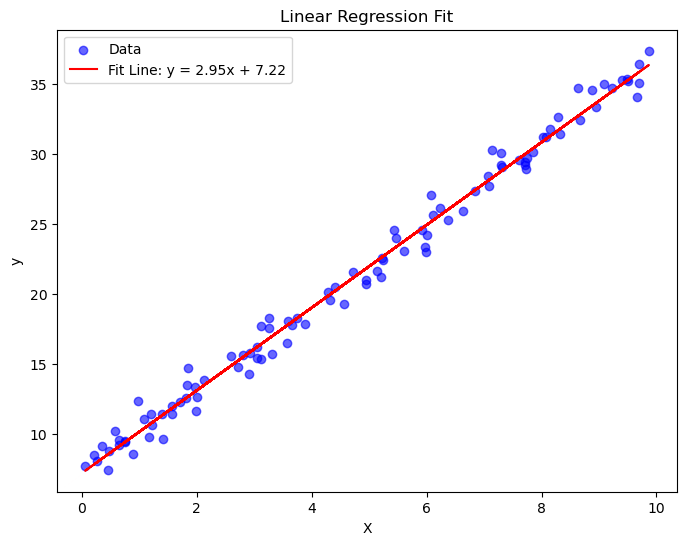

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 데이터 생성
np.random.seed(42)  # 재현성을 위한 시드 설정
n_samples = 100

# y = 3x + 7 + noise 형태의 데이터 생성
X = np.random.rand(n_samples, 1) * 10  # 0 ~ 10 사이의 랜덤 값 (2차원 입력)
true_slope = 3
true_intercept = 7
noise = np.random.randn(n_samples)  # 노이즈 추가
y = true_slope * X.flatten() + true_intercept + noise  # 타겟 값

# 2. Linear Regression 모델 학습
model = LinearRegression()
model.fit(X, y)  # 모델 훈련

# 모델 파라미터
print(f"기울기 (slope): {model.coef_[0]:.4f}")
print(f"절편 (intercept): {model.intercept_:.4f}")

# 3. 예측 및 평가
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# 4. 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data", alpha=0.6)
plt.plot(X, y_pred, color="red", label=f"Fit Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


### 실습문제 1

기울기 (slope): 1.0274
절편 (intercept): -0.5945
x=30일때의 값은:
30.227321237993593


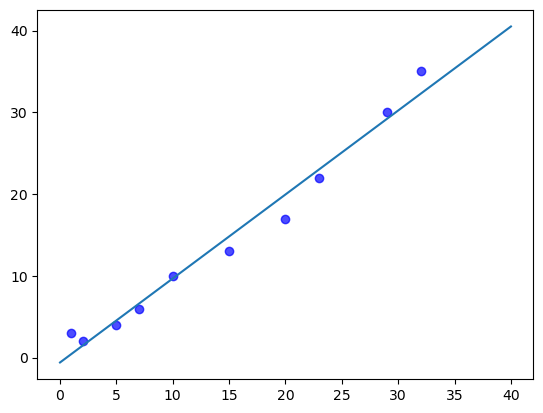

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 예제 데이터 생성
data = {'X': [],
        'y': []}

# dataframe
df = 

# 산점도 그래프


# fit한 직선


# 값 예측



### Under fitting의 예

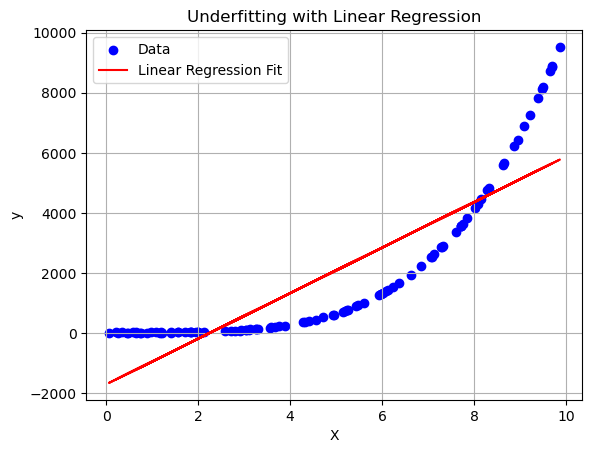

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# 무작위 2D 데이터 생성
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100개의 샘플, 1개의 feature
y = X**4 + 3*X + 5 + np.random.randn(100, 1) * 10  # 2차 함수 형태의 타겟 값 + 노이즈

# 선형 회귀 모델 생성
model = LinearRegression()

# 선형 회귀로 학습
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 그래프 그리기
plt.scatter(X, y, color='blue', label='Data')  # 실제 데이터
plt.plot(X, y_pred, color='red', label='Linear Regression Fit')  # 선형 회귀 모델 예측
plt.title('Underfitting with Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


### Scikit learn의 under fitting vs over fitting

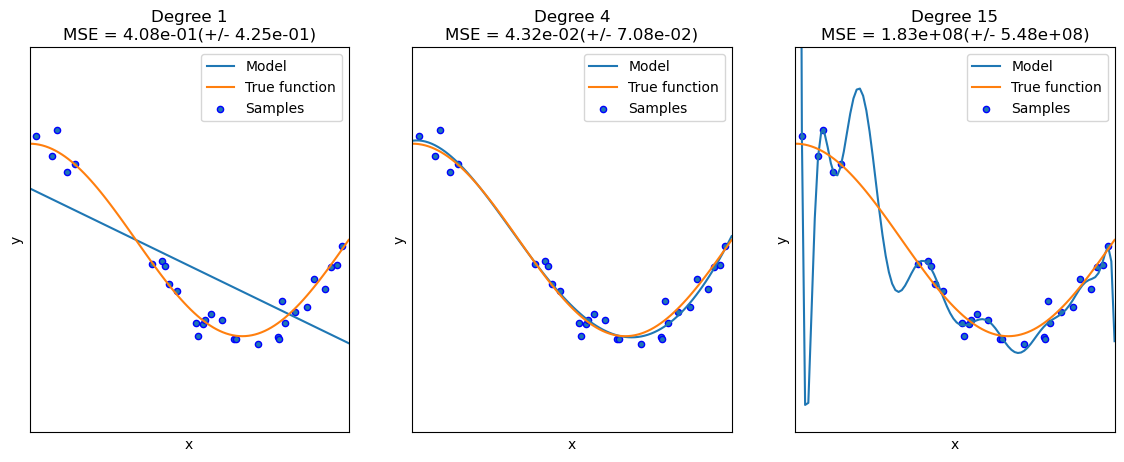

In [5]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## EDA

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# iris dataset 불러오고 pandas의 dataframe으로 만듬
dataset=load_iris()
data=pd.DataFrame(dataset['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [8]:
data['Species']=dataset['target']

In [9]:
# DATAFRAME의 최초 5행 출력
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# data의 행수와 열수
data.shape

(150, 5)

In [11]:
# data의 기초 통계 정보
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# 데이터에 대한 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


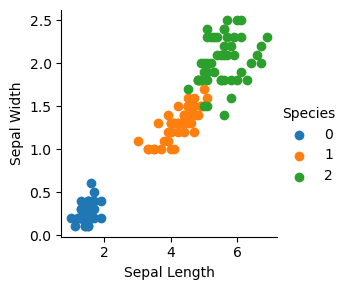

In [13]:
# data의 두 특징을 사용하여 산점도 시각화
sns.FacetGrid(data,hue="Species")\
.map(plt.scatter,"Sepal Length","Sepal Width")\
.add_legend()
plt.show()

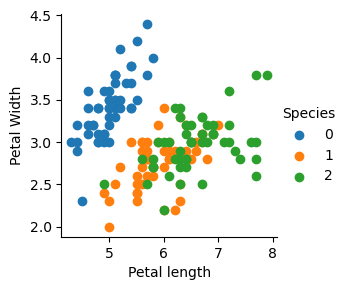

In [14]:
# data의 두 특징을 사용하여 산점도 시각화
sns.FacetGrid(data,hue="Species")\
.map(plt.scatter,"Petal length","Petal Width")\
.add_legend()
plt.show()

<Axes: xlabel='Species', ylabel='Petal Width'>

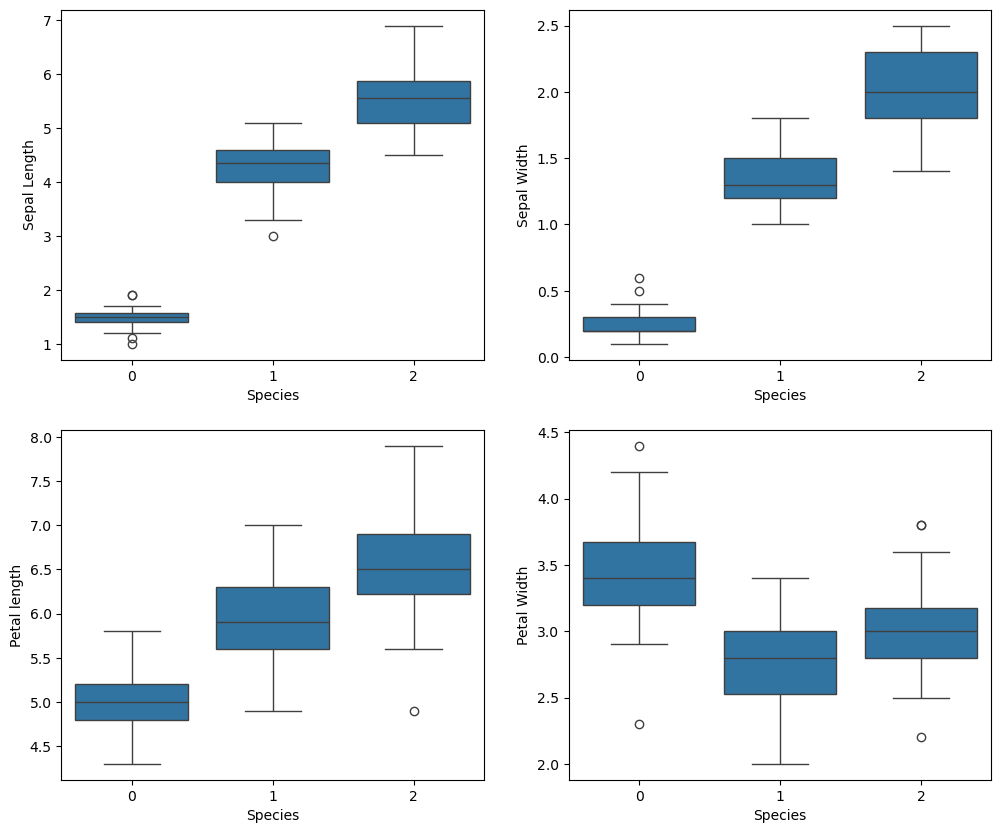

In [15]:
# data의 특징들의 분포
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

### 실습 문제 2

In [16]:
import pandas as pd

# UCI Wine Quality Dataset URL
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# 데이터 읽기
red_wine = pd.read_csv(url_red, sep=';')   # ';'로 구분된 데이터
white_wine = pd.read_csv(url_white, sep=';')


In [17]:
# 데이터프레임 확인


# 데이터프레임 크기 출력



Red Wine Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

In [18]:
# 데이터프레임 통계량 출력


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
# 결측치 확인


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


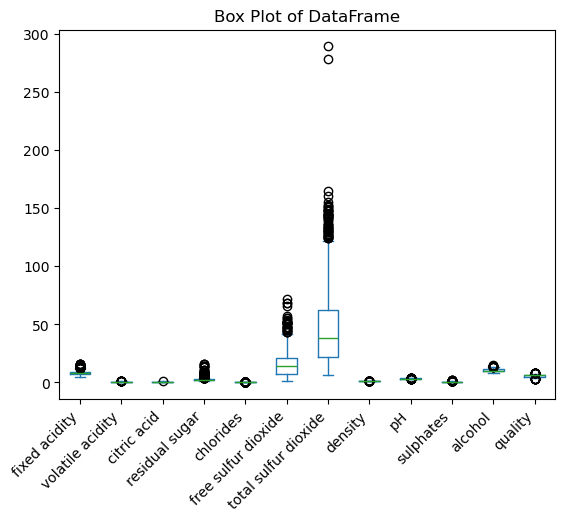

In [20]:
# 레드와인 박스 플롯 그리기

plt.title('Box Plot of DataFrame')
# x축 레이블 회전
plt.xticks(rotation=45, ha='right')  # 45도 회전, 'right'로 정렬
plt.show()

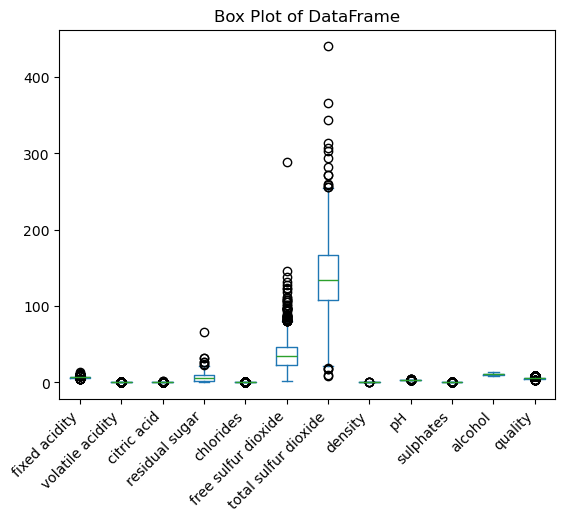

In [21]:
# 화이트와인 박스 플롯 그리기

plt.title('Box Plot of DataFrame')
plt.xticks(rotation=45, ha='right')  # 45도 회전, 'right'로 정렬
plt.show()

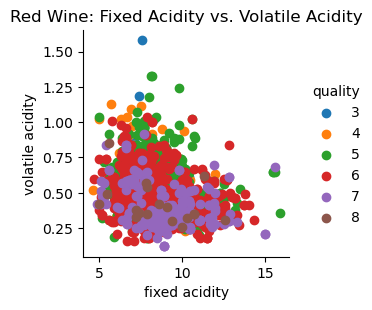

In [22]:
# 산점도 시각화
# data의 두 특징을 사용하여 산점도 시각화
import seaborn as sns
sns.FacetGrid(red_wine, hue="quality")\
.map(plt.scatter, "fixed acidity", "volatile acidity")\
.add_legend()
plt.title("Red Wine: Fixed Acidity vs. Volatile Acidity")
plt.show()

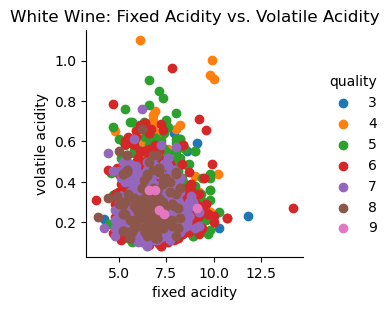

In [23]:
sns.FacetGrid(white_wine, hue="quality")\
.map(plt.scatter, "fixed acidity", "volatile acidity")\
.add_legend()
plt.title("White Wine: Fixed Acidity vs. Volatile Acidity")
plt.show()

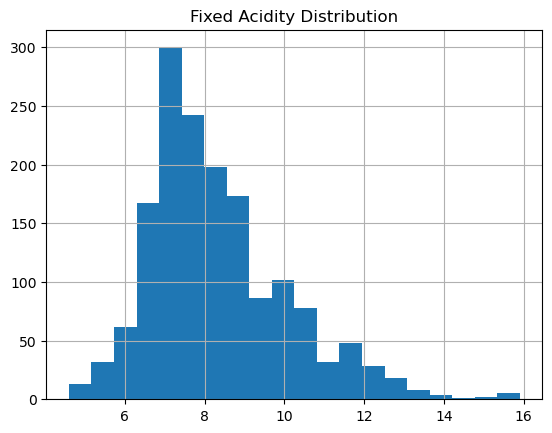

In [24]:
red_wine['fixed acidity'].hist(bins=20)  # 'fixed acidity'로 수정
plt.title("Fixed Acidity Distribution")
plt.show()

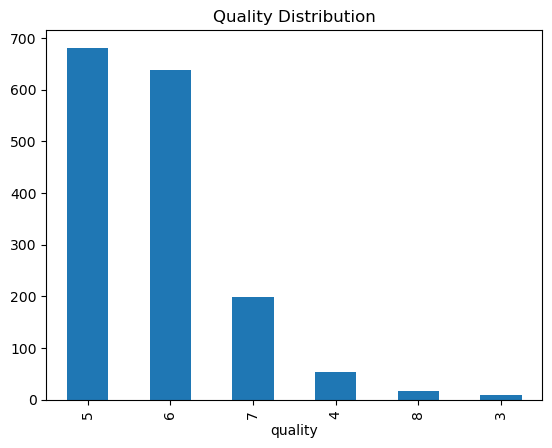

In [25]:
red_wine['quality'].value_counts().plot(kind='bar')
plt.title("Quality Distribution")
plt.show()

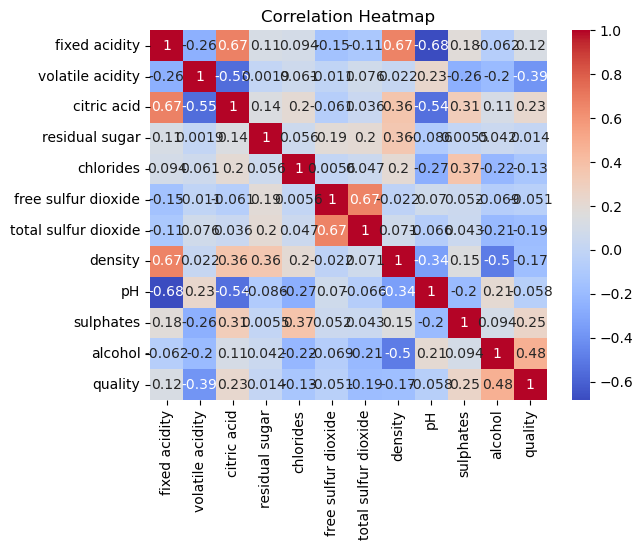

In [26]:
corr = red_wine.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## IRIS DATASET에 대한 KNN 분류기 예

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


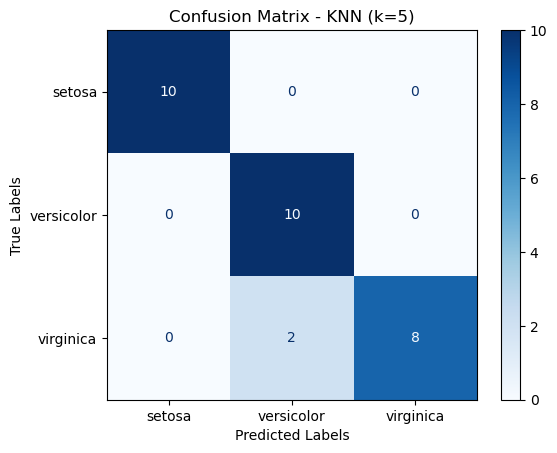

Test Accuracy: 0.93


In [27]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 1. 데이터 로드
iris = datasets.load_iris()
X = iris.data  # 모든 특징 사용
y = iris.target

# 2. 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. KNN 분류기 정의 및 학습
k = 5  # K값 설정
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 5. 모델 예측
y_pred = knn.predict(X_test)

# 6. 혼동 행렬 계산 및 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)

# 혼동 행렬 출력 및 시각화
print("Confusion Matrix:")
print(conf_matrix)
disp.plot(cmap='Blues')
disp.ax_.set_title(f'Confusion Matrix - KNN (k={k})')
disp.ax_.set_xlabel('Predicted Labels')
disp.ax_.set_ylabel('True Labels')
plt.show()

# 7. 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


### 실습문제 3

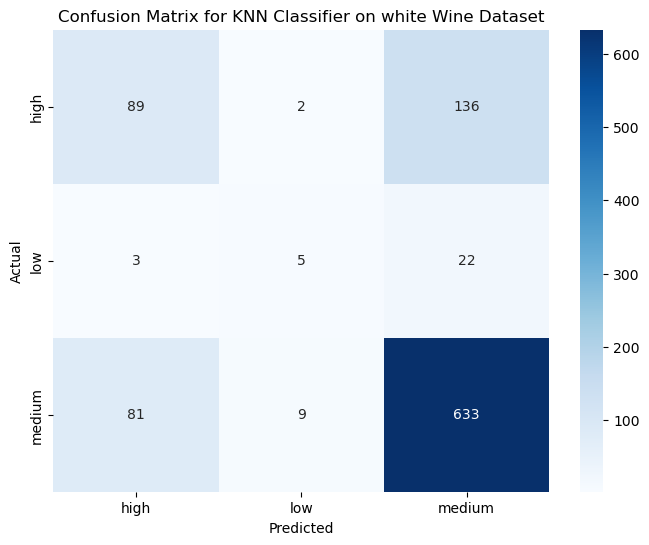

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# UCI Wine Quality Dataset URL
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# 데이터 읽기
df = pd.read_csv(url_red, sep=';')   # ';'로 구분된 데이터

X = df.drop('quality', axis=1)  # features
y = df['quality']  # target: quality

# wine quality 한번 더 3단계로 target class 나눔
# 품질을 기준으로 범주화 (예: 3~5: 낮음, 6: 중간, 7~9: 높음)
y = y.apply(lambda q: 'low' if q <= 4 else 'high' if q >= 7 else 'medium')

# 정규화



# 3. 훈련 데이터와 테스트 데이터 분리


# 4. KNN 모델 학습



# 5. 예측


# 6. Confusion Matrix 계산


# 7. Confusion Matrix 시각화



In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7418367346938776


## Data preprocessing (standarization)의 필요성

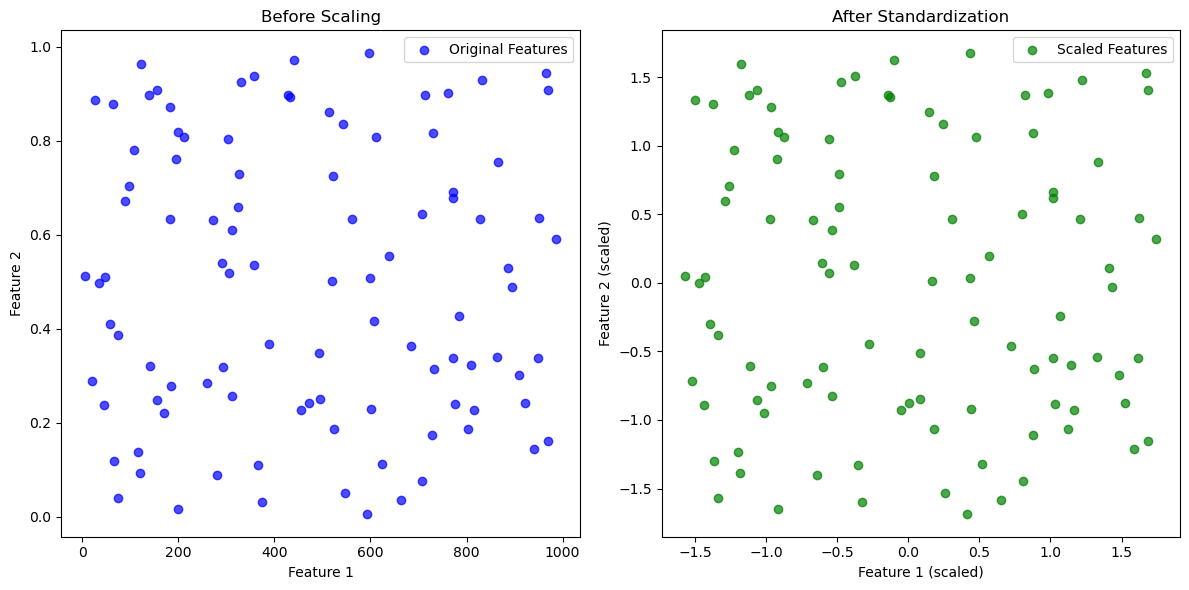

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터 생성
np.random.seed(42)
feature_1 = np.random.uniform(0, 1000, 100)  # 스케일이 큰 값
feature_2 = np.random.uniform(0, 1, 100)     # 스케일이 작은 값

# 스케일링 전 데이터
data = np.column_stack((feature_1, feature_2))

# 스케일링 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 스케일링 전
axes[0].scatter(data[:, 0], data[:, 1], color='blue', alpha=0.7, label='Original Features')
axes[0].set_title('Before Scaling')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()

# 스케일링 후
axes[1].scatter(scaled_data[:, 0], scaled_data[:, 1], color='green', alpha=0.7, label='Scaled Features')
axes[1].set_title('After Standardization')
axes[1].set_xlabel('Feature 1 (scaled)')
axes[1].set_ylabel('Feature 2 (scaled)')
axes[1].legend()

plt.tight_layout()
plt.show()


In [31]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

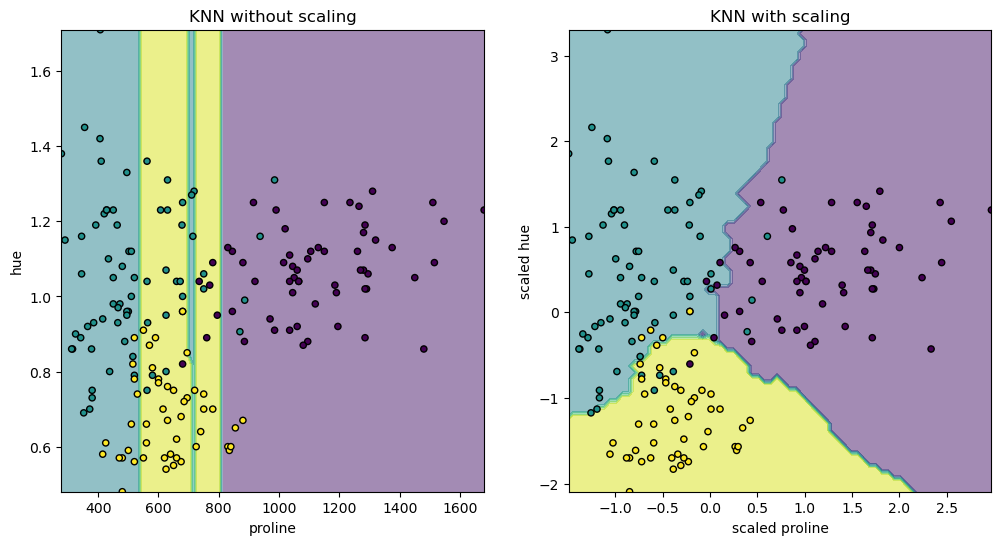

In [32]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")

### 범주형 데이터 처리: ONE HOT ENCODING

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 타이타닉 데이터셋 로드 (여기서는 예시로 데이터프레임을 생성)
data = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath'],
    'Sex': ['male', 'female', 'female', 'female'],
    'Age': [22, 38, 26, 35],
    'Fare': [7.25, 71.2833, 7.925, 53.1]
})

# LabelEncoder 객체 생성
le = LabelEncoder()

# 'Sex' 컬럼을 인코딩
data['Sex'] = le.fit_transform(data['Sex'])

# 결과 확인
print(data)


   PassengerId                          Name  Sex  Age     Fare
0            1       Braund, Mr. Owen Harris    1   22   7.2500
1            2    Cumings, Mrs. John Bradley    0   38  71.2833
2            3        Heikkinen, Miss. Laina    0   26   7.9250
3            4  Futrelle, Mrs. Jacques Heath    0   35  53.1000


In [34]:
import pandas as pd

# 타이타닉 데이터셋 로드 (예시로 데이터프레임을 생성)
data = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Embarked': ['S', 'C', 'S', 'Q'],
    'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath'],
    'Sex': ['male', 'female', 'female', 'female'],
    'Age': [22, 38, 26, 35],
    'Fare': [7.25, 71.2833, 7.925, 53.1]
})

# Embarked 컬럼에 대해 One-Hot Encoding을 수행
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')

# 결과 확인
print(data)


   PassengerId                          Name     Sex  Age     Fare  \
0            1       Braund, Mr. Owen Harris    male   22   7.2500   
1            2    Cumings, Mrs. John Bradley  female   38  71.2833   
2            3        Heikkinen, Miss. Laina  female   26   7.9250   
3            4  Futrelle, Mrs. Jacques Heath  female   35  53.1000   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False        True       False  


## Missing value 채우기

In [35]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# 샘플 데이터 생성 (결측값 포함)
data = {
    'Age': [25, np.nan, 30, np.nan, 35],
    'Salary': [50000, 60000, np.nan, 80000, 90000],
    'Gender': ['Male', 'Female', np.nan, 'Female', 'Male']
}
df = pd.DataFrame(data)

# Numeric 데이터에 대해 평균으로 결측값 채우기
numeric_imputer = SimpleImputer(strategy='mean')
df[['Age', 'Salary']] = numeric_imputer.fit_transform(df[['Age', 'Salary']])

# Categorical 데이터에 대해 최빈값으로 결측값 채우기
categorical_imputer = SimpleImputer(strategy='most_frequent')
# Reshape the output to be 1D
df['Gender'] = categorical_imputer.fit_transform(df[['Gender']]).ravel()
#The ravel() method is used here to flatten the 2D array returned by fit_transform into a 1D array.

# 결과 출력
print(df)

    Age   Salary  Gender
0  25.0  50000.0    Male
1  30.0  60000.0  Female
2  30.0  70000.0  Female
3  30.0  80000.0  Female
4  35.0  90000.0    Male


In [36]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# 샘플 데이터 생성 (결측값 포함)
data = {
    'Age': [25, np.nan, 30, np.nan, 35],
    'Salary': [50000, 60000, np.nan, 80000, 90000],
    'Gender': ['Male', 'Female', 'Female', 'Female', 'Male']
}
df = pd.DataFrame(data)

# 숫자형 데이터만 KNN Imputer에 적용 (Gender는 제외)
knn_imputer = KNNImputer(n_neighbors=2)  # K=2로 설정 (두 개의 이웃을 고려)
df[['Age', 'Salary']] = knn_imputer.fit_transform(df[['Age', 'Salary']])

# 결과 출력
print(df)


    Age   Salary  Gender
0  25.0  50000.0    Male
1  30.0  60000.0  Female
2  30.0  70000.0  Female
3  30.0  80000.0  Female
4  35.0  90000.0    Male


### SVM 실습

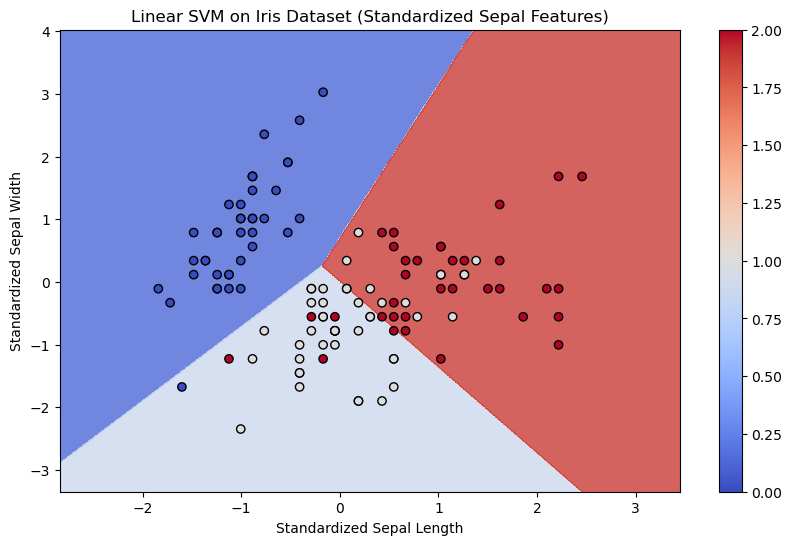

Test Accuracy: 0.73


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 1. 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # sepal length, sepal width
y = iris.target

# 2. 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Linear SVM 모델 정의 및 학습
svm = LinearSVC(C=1.0)
svm.fit(X_train, y_train)

# 5. 분류 경계 시각화를 위한 Meshgrid 생성
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 6. Meshgrid 데이터를 사용해 분류 결과 예측
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 7. 시각화
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # Decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)  # 학습 데이터 포인트
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.title('Linear SVM on Iris Dataset (Standardized Sepal Features)')
plt.colorbar()
plt.show()

# 8. 모델 평가
accuracy = svm.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


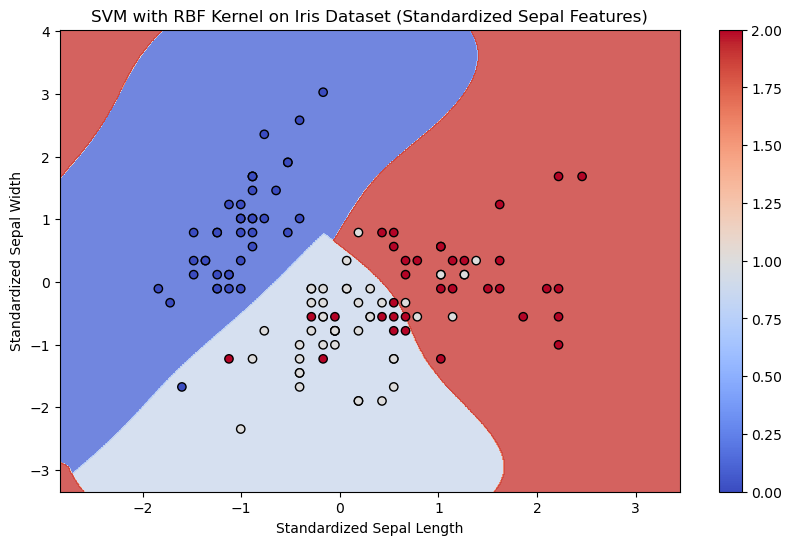

Test Accuracy: 0.73


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 1. 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # sepal length, sepal width
y = iris.target

# 2. 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Kernel Trick을 사용한 SVM 정의 및 학습
svm = SVC(kernel='rbf', C=1.0, gamma='auto')  # RBF 커널 사용
svm.fit(X_train, y_train)

# 5. 분류 경계 시각화를 위한 Meshgrid 생성
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 6. Meshgrid 데이터를 사용해 분류 결과 예측
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 7. 시각화
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # Decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)  # 학습 데이터 포인트
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.title('SVM with RBF Kernel on Iris Dataset (Standardized Sepal Features)')
plt.colorbar()
plt.show()

# 8. 모델 평가
accuracy = svm.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


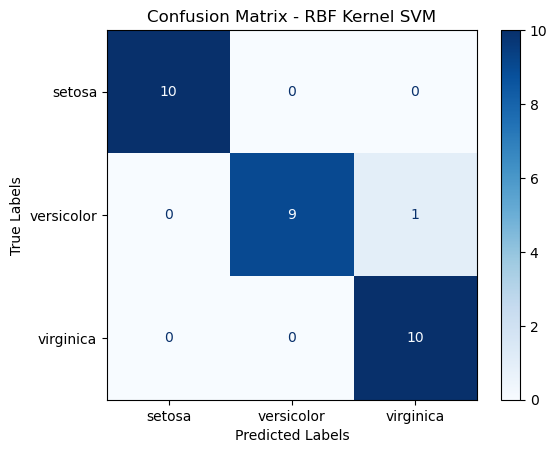

Test Accuracy: 0.97


In [39]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 1. 데이터 로드
iris = datasets.load_iris()
X = iris.data  # 모든 특징 사용
y = iris.target

# 2. 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. RBF Kernel을 사용한 SVM 정의 및 학습
svm = SVC(kernel='rbf', C=1.0, gamma='auto')  # RBF 커널 적용
svm.fit(X_train, y_train)

# 5. 모델 예측
y_pred = svm.predict(X_test)

# 6. 혼동 행렬 계산 및 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)

# 혼동 행렬 출력 및 시각화
print("Confusion Matrix:")
print(conf_matrix)
disp.plot(cmap='Blues')
disp.ax_.set_title('Confusion Matrix - RBF Kernel SVM')
disp.ax_.set_xlabel('Predicted Labels')
disp.ax_.set_ylabel('True Labels')
plt.show()

# 7. 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


### 실습문제 4

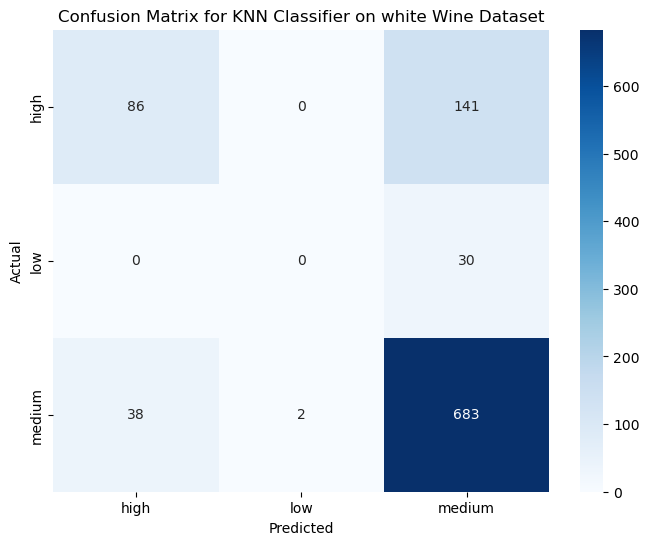

0.7846938775510204


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# UCI Wine Quality Dataset URL
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# 데이터 읽기
df = pd.read_csv(url_red, sep=';')   # ';'로 구분된 데이터

X = df.drop('quality', axis=1)  # features
y = df['quality']  # target: quality

# wine quality 한번 더 3단계로 target class 나눔
# 품질을 기준으로 범주화 (예: 3~4: 낮음, 6: 중간, 7~9: 높음)
y = y.apply(lambda q: 'low' if q <= 4 else 'high' if q >= 7 else 'medium')

# 정규화



# 3. 훈련 데이터와 테스트 데이터 분리


# 4. svm 모델 학습 RBF 커널 적용


# 5. 예측


# 6. Confusion Matrix 계산


# 7. Confusion Matrix 시각화

